Model with Synthetic Data

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


C:\Users\lysla\AppData\Local\Temp\ipykernel_30688\135985753.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
# Load dataset
file_path = 'BAN6025Project2Data.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df['X27'] = df['X27'].replace('x11','windows')
if 'ID' in df.columns:
    df = df.drop(['ID'], axis=1)

# Identify target variable
target_variable = 'Target_Y'

# Handle missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Convert categorical variables to dummies
X = df.drop([target_variable], axis=1)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype='float')

# Define target variable
y = df[target_variable]

# Check class distribution
print("Original class distribution:\n", y.value_counts())

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy=0.3, random_state=42)  # Adjust ratio as needed
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled class distribution:\n", y_resampled.value_counts())

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)


Original class distribution:
 Target_Y
0    988971
1     11029
Name: count, dtype: int64
Resampled class distribution:
 Target_Y
0    988971
1    296691
Name: count, dtype: int64


In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=25, min_samples_leaf=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")


'decision_tree_default.pdf'

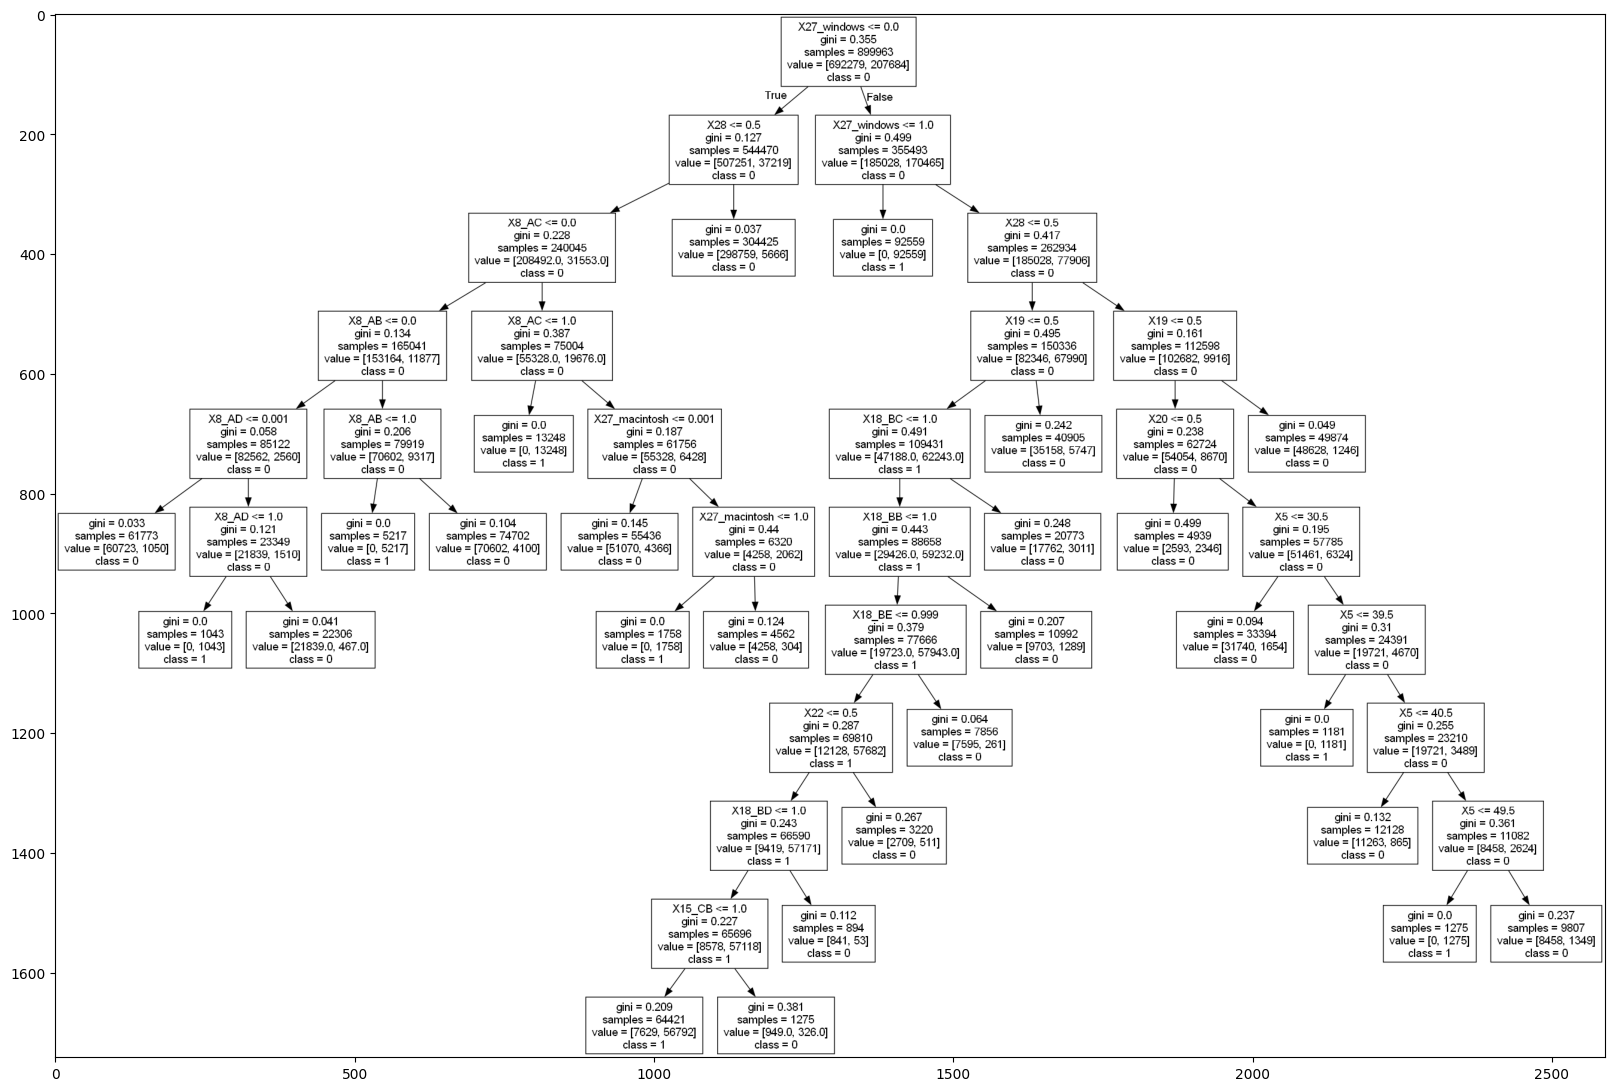

In [ ]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)
plt.show()

In [ ]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)


y_pred_test = dt.predict(X_test)


y_pred_test1 = dt.predict(X_test1)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)
y_prob_test1 = dt.predict_proba(X_test1)




In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
AUC_train = roc_auc_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("f1 score.  : {:.4f}".format(f1_train))
print("AUC  : {:.4f}".format(AUC_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
AUC_test = roc_auc_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("f1 score.  : {:.4f}".format(f1_test))
print("AUC  : {:.4f}".format(AUC_test))



 -- train set -- 
Accuracy : 0.9531
Precision: 0.9578
Recall.  : 0.8333
f1 score.  : 0.8912
AUC  : 0.9112

 -- test set -- 
Accuracy : 0.9527
Precision: 0.9566
Recall.  : 0.8329
f1 score.  : 0.8905
AUC  : 0.9108


In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[684650  34611]
 [  7629 173073]]
[[293327  14869]
 [  3365  74138]]


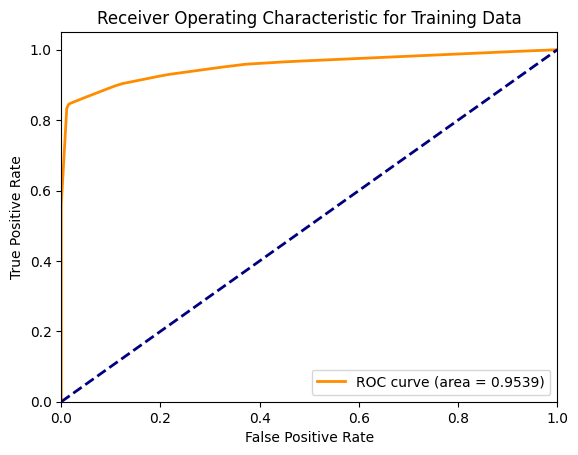

In [ ]:

# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train[:, 1])  # Ensure y_train is numeric
roc_auc = roc_auc_score(y_train, y_prob_train[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


    importance        feature
45    0.575007    X27_windows
27    0.086950          X8_AC
22    0.083867            X28
15    0.047615            X19
26    0.038173          X8_AB
37    0.037696         X18_BC
39    0.036346         X18_BE
36    0.031158         X18_BB
4     0.017130             X5
18    0.012312            X22
43    0.011892  X27_macintosh
28    0.008132          X8_AD
16    0.004976            X20
38    0.004738         X18_BD
30    0.004008         X15_CB
13    0.000000            X16
11    0.000000            X13
10    0.000000            X12
9     0.000000            X11
12    0.000000            X14
7     0.000000             X9
6     0.000000             X7
5     0.000000             X6
3     0.000000             X4
2     0.000000             X3
1     0.000000             X2
0     0.000000             X1
8     0.000000            X10
21    0.000000            X26
14    0.000000            X17
29    0.000000          X8_AE
23    0.000000            X29
24    0.00

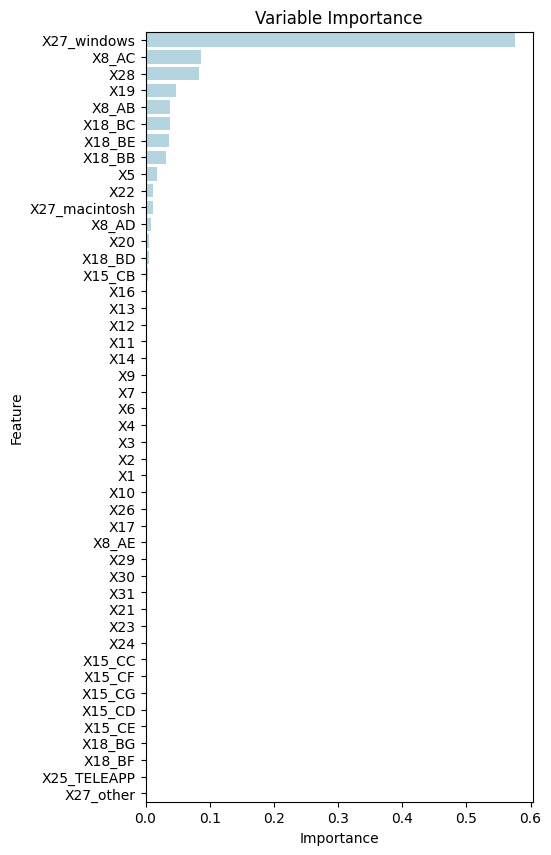

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(n_estimators=150, 
                            max_features=6, 
                            max_depth=None, 
                            min_samples_leaf=1, 
                            random_state=904,
                            n_jobs=-1)  # Parallelize across all cores

# Fit the model
rf.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf)
prec_train = precision_score(y_train, y_pred_train_rf)
rec_train = recall_score(y_train, y_pred_train_rf)
f1_train = f1_score(y_train, y_pred_train_rf)
AUC_train = roc_auc_score(y_train, y_pred_train_rf)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1-score : {:.4f}".format(f1_train))
print("AUC : {:.4f}".format(AUC_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf)
prec_test = precision_score(y_test, y_pred_test_rf)
rec_test = recall_score(y_test, y_pred_test_rf)
f1_test = f1_score(y_test, y_pred_test_rf)
AUC_test = roc_auc_score(y_test, y_pred_test_rf)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1-score : {:.4f}".format(f1_test))
print("AUC : {:.4f}".format(AUC_test))

 -- train set -- 
Accuracy : 1.0000
Precision: 1.0000
Recall.  : 1.0000
F1-score : 1.0000

 -- test set -- 
Accuracy : 0.9906
Precision: 0.9962
Recall.  : 0.9629
F1-score : 0.9793


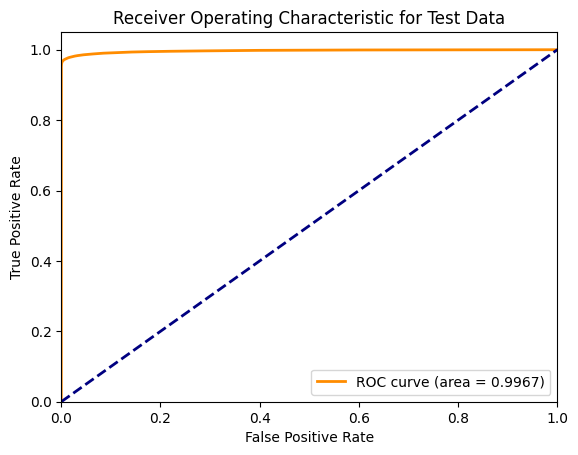

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_rf[:,1])
roc_auc = roc_auc_score(y_test, y_prob_test_rf[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


GRADIENT BOOSTING

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

# Create an instance of HistGradientBoostingClassifier
gb = HistGradientBoostingClassifier(max_iter=100,  # Iterations (similar to n_estimators in regular GB)
                                    learning_rate=0.1, 
                                    max_depth=3, 
                                    random_state=904)  # Removed n_jobs=-1

# Fit the model to the training data
gb.fit(X_train, y_train)


HistGradientBoostingClassifier(max_depth=3, random_state=904)

In [ ]:
# make predictions on the training and test data
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

y_prob_train_gb = gb.predict_proba(X_train)
y_prob_test_gb = gb.predict_proba(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy, precision, recall, and F1-score for the training set
acc_train = accuracy_score(y_train, y_pred_train_gb)
prec_train = precision_score(y_train, y_pred_train_gb)
rec_train = recall_score(y_train, y_pred_train_gb)
f1_train = f1_score(y_train, y_pred_train_gb)
AUC_train = roc_auc_score(y_train, y_pred_train_gb)

# Print the training set scores
print(" -- Train Set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall   : {:.4f}".format(rec_train))
print("F1-score : {:.4f}".format(f1_train))
print("AUC : {:.4f}".format(AUC_train))
print("")

# Calculate the accuracy, precision, recall, and F1-score for the test set
acc_test = accuracy_score(y_test, y_pred_test_gb)
prec_test = precision_score(y_test, y_pred_test_gb)
rec_test = recall_score(y_test, y_pred_test_gb)
f1_test = f1_score(y_test, y_pred_test_gb)
AUC_test = roc_auc_score(y_test, y_pred_test_gb)

# Print the test set scores
print(" -- Test Set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall   : {:.4f}".format(rec_test))
print("F1-score : {:.4f}".format(f1_test))
print("AUC : {:.4f}".format(AUC_test))


 -- Train Set -- 
Accuracy : 0.9815
Precision: 0.9840
Recall   : 0.9348
F1-score : 0.9588

 -- Test Set -- 
Accuracy : 0.9816
Precision: 0.9841
Recall   : 0.9352
F1-score : 0.9590


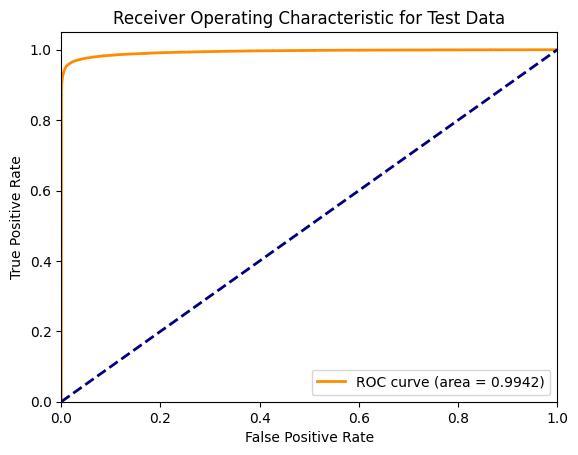

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_gb[:,1])
roc_auc = roc_auc_score(y_test, y_prob_test_gb[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


Model not using synthetic data

In [ ]:
# Load dataset
file_path = 'BAN6025Project2Data.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df['X27'] = df['X27'].replace('x11','windows')
if 'ID' in df.columns:
    df = df.drop(['ID'], axis=1)

# Identify target variable
target_variable = 'Target_Y'

# Handle missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Convert categorical variables to dummies
X = df.drop([target_variable], axis=1)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype='float')

# Define target variable
y = df[target_variable]

# Check class distribution
print("Original class distribution:\n", y.value_counts())

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.2, random_state=42)  # Keep 20% of the majority class
X_resampled, y_resampled = rus.fit_resample(X, y)


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)


Original class distribution:
 Target_Y
0    988971
1     11029
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=150, 
    max_features=6, 
    max_depth=None, 
    min_samples_leaf=1, 
    random_state=904, 
    class_weight='balanced',  # Adjust class weights automatically
    n_jobs=-1  # Use all CPU cores for parallel processing
)

# Fit the model to the training data
rf.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=10,  # Number of different combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1-score (good for imbalanced data)
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", random_search.best_params_)

# Best model
best_rf = random_search.best_estimator_



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [ ]:
rf = best_rf
# make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf)
prec_train = precision_score(y_train, y_pred_train_rf)
rec_train = recall_score(y_train, y_pred_train_rf)
f1_train = f1_score(y_train, y_pred_train_rf)
AUC_train = roc_auc_score(y_train,y_pred_train_rf)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("f1_score: {:.4f}".format(f1_train))
print("AUC  : {:.4f}".format(AUC_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf)
prec_test = precision_score(y_test, y_pred_test_rf)
rec_test = recall_score(y_test, y_pred_test_rf)
f1_test = f1_score(y_test, y_pred_test_rf)
AUC_test = roc_auc_score(y_test,y_pred_test_rf)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("f1_score: {:.4f}".format(f1_test))
print("AUC  : {:.4f}".format(AUC_test))

 -- train set -- 
Accuracy : 0.9841
Precision: 0.9129
Recall.  : 1.0000
f1_score: 0.9544
AUC  : 0.9905

 -- test set -- 
Accuracy : 0.8750
Precision: 0.6352
Recall.  : 0.5872
f1_score: 0.6102
AUC  : 0.7599


In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train_rf, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test_rf, y_test)
print(conf_matrix)

[[37864     0]
 [  737  7720]]
[[15428  1366]
 [ 1116  1943]]
